## COVERAGE

In [1]:
import os
import numpy as np
import jax.numpy as jnp
from rsnl.metrics import plot_and_save_coverage
import matplotlib.pyplot as plt
# import pickle as pkl

/Users/ryankelly/python_projects/rsnl/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_coverage(directory=""):
    sub_dirs = [x[0] for x in os.walk(directory)]
    sub_dirs = sub_dirs[1:]
    number_saved_coverage_levels = 21
    coverage_mat = np.empty((len(sub_dirs), number_saved_coverage_levels), dtype='int32')
    count = 0
    valid_idx = []
    for sub_dir in sub_dirs:
        try:
            with open(f'{sub_dir}/coverage.txt', 'r') as f:
                lines = f.read().split('\n')
                lines = lines[:-1]
                lines = jnp.array(lines, dtype='int32')
                coverage_mat[count, :] = lines
                valid_idx.append(count)
                count += 1
        except FileNotFoundError as e:
            # coverage_mat[count, :] = np.NaN
            # count += 1
            print(e)
            print(f'No coverage file found in {sub_dir}')
    empirical_coverage = np.mean(coverage_mat[valid_idx, :], axis=0)
    print('empirical_coverage: ', empirical_coverage)
    return empirical_coverage

In [3]:
def generate_coverage_plot(directory="", title=""):  # TODO!!
    empirical_coverage = get_coverage(directory)
    plot_and_save_coverage(empirical_coverage)
    plt.title(title)

In [4]:
def plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                            title="",
                            folder_name=""):
    """Plot coverage."""
    # TODO: could improve
    plt.clf()
    plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')
    plt.plot(np.linspace(0, 1, len(empirical_coverage_rsnl)), empirical_coverage_rsnl,
             label='RSNL')
    plt.plot(np.linspace(0, 1, len(empirical_coverage_snl)), empirical_coverage_snl,
             label='SNL', linestyle='dashed')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("Credibility level")
    plt.ylabel("Empirical coverage")
    plt.legend()
    plt.title(title)
    plt.savefig(f"{folder_name}empirical_coverage.png")


empirical_coverage:  [0.         0.07017544 0.15789474 0.24561404 0.28070175 0.29824561
 0.31578947 0.35087719 0.40350877 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.71929825 0.75438596 0.77192982 0.84210526
 0.89473684 0.92982456 1.        ]
empirical_coverage:  [0.         0.         0.         0.01818182 0.01818182 0.01818182
 0.03636364 0.03636364 0.03636364 0.03636364 0.03636364 0.03636364
 0.05454545 0.07272727 0.07272727 0.07272727 0.07272727 0.09090909
 0.14545455 0.2        1.        ]


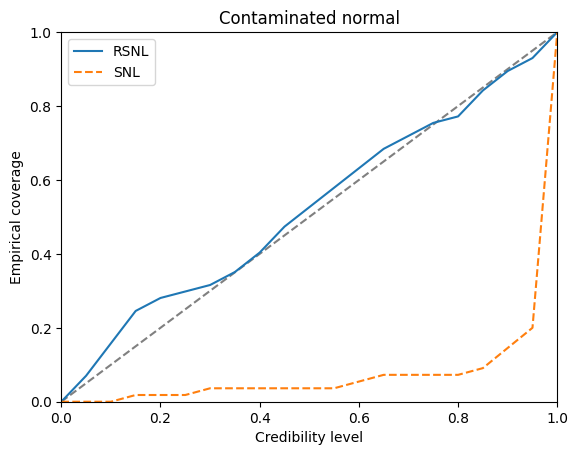

In [5]:
directory = '../res/contaminated_normal/rsnl/'
empirical_coverage_rsnl = get_coverage(directory)

directory = '../res/contaminated_normal/snl/'
empirical_coverage_snl = get_coverage(directory)

plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        title="Contaminated normal")

empirical_coverage:  [0.         0.07042254 0.16901408 0.18309859 0.22535211 0.28169014
 0.33802817 0.36619718 0.4084507  0.43661972 0.49295775 0.54929577
 0.5915493  0.64788732 0.69014085 0.77464789 0.81690141 0.90140845
 0.94366197 0.95774648 1.        ]
[Errno 2] No such file or directory: '../res/sir/snl/seed_131/coverage.txt'
No coverage file found in ../res/sir/snl/seed_131
[Errno 2] No such file or directory: '../res/sir/snl/seed_83/coverage.txt'
No coverage file found in ../res/sir/snl/seed_83
[Errno 2] No such file or directory: '../res/sir/snl/seed_123/coverage.txt'
No coverage file found in ../res/sir/snl/seed_123
empirical_coverage:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02352941 0.05882353 0.07058824 0.08235294
 0.10588235 0.14117647 1.        ]


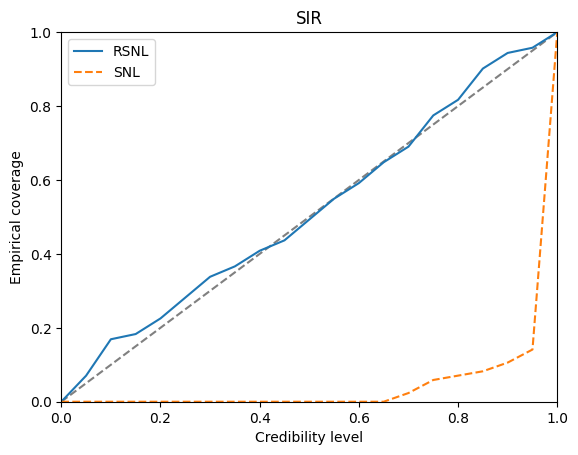

In [6]:
directory = '../res/sir/rsnl/'
empirical_coverage_rsnl = get_coverage(directory)

directory = '../res/sir/snl/'
empirical_coverage_snl = get_coverage(directory)

plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        title="SIR")

[Errno 2] No such file or directory: '../res/contaminated_slcp/rsnl/seed_61/coverage.txt'
No coverage file found in ../res/contaminated_slcp/rsnl/seed_61
[Errno 2] No such file or directory: '../res/contaminated_slcp/rsnl/seed_138/coverage.txt'
No coverage file found in ../res/contaminated_slcp/rsnl/seed_138
empirical_coverage:  [0.         0.44723618 0.56281407 0.65829146 0.72864322 0.75879397
 0.79899497 0.84924623 0.87437186 0.90452261 0.91457286 0.95477387
 0.96984925 0.97487437 0.97487437 0.98492462 0.98994975 0.98994975
 1.         1.         1.        ]
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_156/coverage.txt'
No coverage file found in ../res/contaminated_slcp/snl/seed_156
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_169/coverage.txt'
No coverage file found in ../res/contaminated_slcp/snl/seed_169
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_151/coverage.txt'
No coverage file found in ../res/co

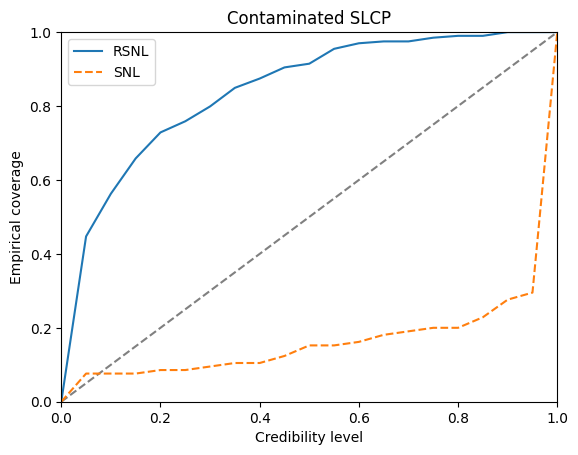

In [7]:
directory = '../res/contaminated_slcp/rsnl/'
empirical_coverage_rsnl = get_coverage(directory)

directory = '../res/contaminated_slcp/snl/'
empirical_coverage_snl = get_coverage(directory)

plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        title="Contaminated SLCP")

In [8]:
# directory = '../res/misspec_ma1/rsnl/'
# empirical_coverage_rsnl = get_coverage(directory)

# directory = '../res/misspec_ma1/snl/'
# empirical_coverage_snl = get_coverage(directory)

# plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
#                         title="Misspecified MA(1)")

empirical_coverage:  [0.         0.07042254 0.16901408 0.18309859 0.22535211 0.28169014
 0.33802817 0.36619718 0.4084507  0.43661972 0.49295775 0.54929577
 0.5915493  0.64788732 0.69014085 0.77464789 0.81690141 0.90140845
 0.94366197 0.95774648 1.        ]


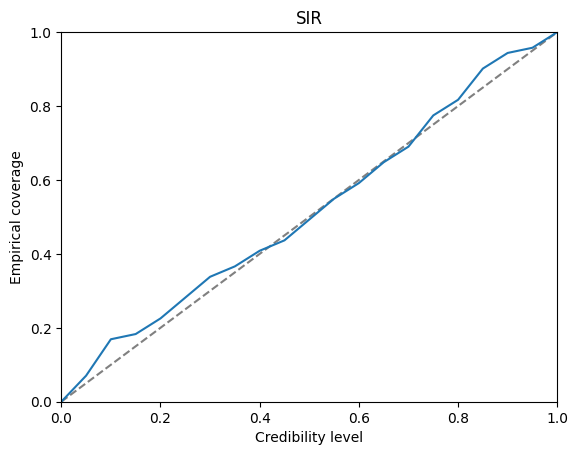

In [9]:
directory = '../res/sir/rsnl/'
generate_coverage_plot(directory, title="SIR")

empirical_coverage:  [0.         0.03921569 0.03921569 0.03921569 0.03921569 0.07843137
 0.11764706 0.17647059 0.23529412 0.35294118 0.54901961 0.88235294
 0.94117647 0.96078431 0.96078431 0.96078431 0.98039216 1.
 1.         1.         1.        ]


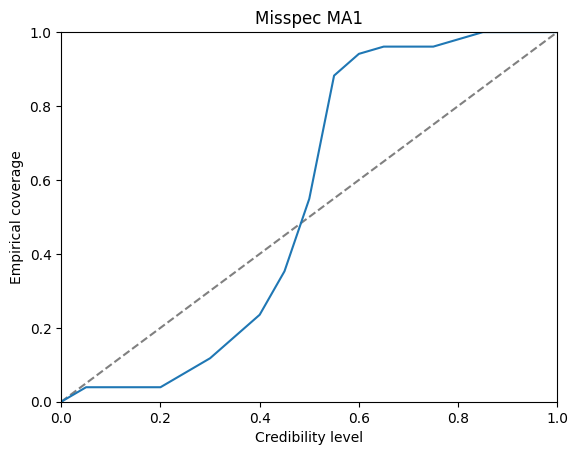

In [10]:
directory = '../res/misspec_ma1/rsnl/'
generate_coverage_plot(directory, title="Misspec MA1")

## SNL

empirical_coverage:  [0.         0.         0.         0.01818182 0.01818182 0.01818182
 0.03636364 0.03636364 0.03636364 0.03636364 0.03636364 0.03636364
 0.05454545 0.07272727 0.07272727 0.07272727 0.07272727 0.09090909
 0.14545455 0.2        1.        ]


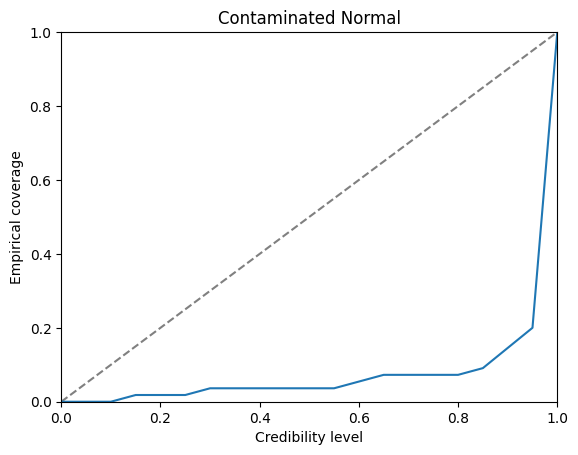

In [11]:
directory = '../res/contaminated_normal/snl/'
generate_coverage_plot(directory, title="Contaminated Normal")

/Users/ryankelly/python_projects/rsnl/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ryankelly/python_projects/rsnl/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


empirical_coverage:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]


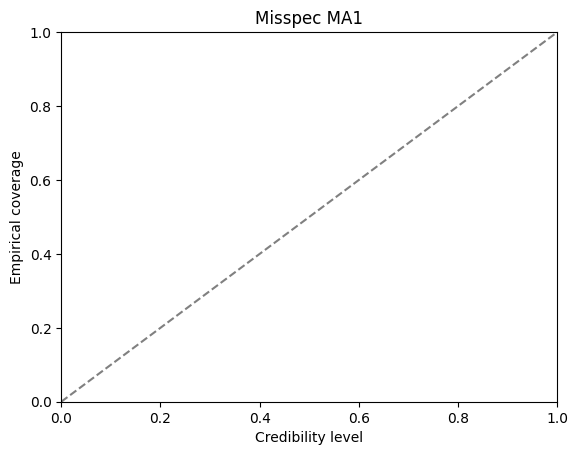

In [12]:
directory = '../res/misspec_ma1/snl/'
generate_coverage_plot(directory, title="Misspec MA1")

[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_156/coverage.txt'
No coverage file found in ../res/contaminated_slcp/snl/seed_156
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_169/coverage.txt'
No coverage file found in ../res/contaminated_slcp/snl/seed_169
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_151/coverage.txt'
No coverage file found in ../res/contaminated_slcp/snl/seed_151
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_167/coverage.txt'
No coverage file found in ../res/contaminated_slcp/snl/seed_167
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_193/coverage.txt'
No coverage file found in ../res/contaminated_slcp/snl/seed_193
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_194/coverage.txt'
No coverage file found in ../res/contaminated_slcp/snl/seed_194
[Errno 2] No such file or directory: '../res/contaminated_slcp/snl/seed_160/

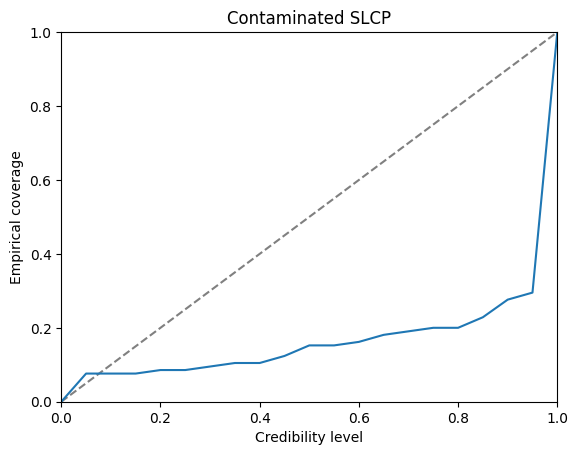

In [13]:
directory = '../res/contaminated_slcp/snl/'
generate_coverage_plot(directory, title="Contaminated SLCP")

[Errno 2] No such file or directory: '../res/sir/snl/seed_131/coverage.txt'
No coverage file found in ../res/sir/snl/seed_131
[Errno 2] No such file or directory: '../res/sir/snl/seed_83/coverage.txt'
No coverage file found in ../res/sir/snl/seed_83
[Errno 2] No such file or directory: '../res/sir/snl/seed_123/coverage.txt'
No coverage file found in ../res/sir/snl/seed_123
empirical_coverage:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02352941 0.05882353 0.07058824 0.08235294
 0.10588235 0.14117647 1.        ]


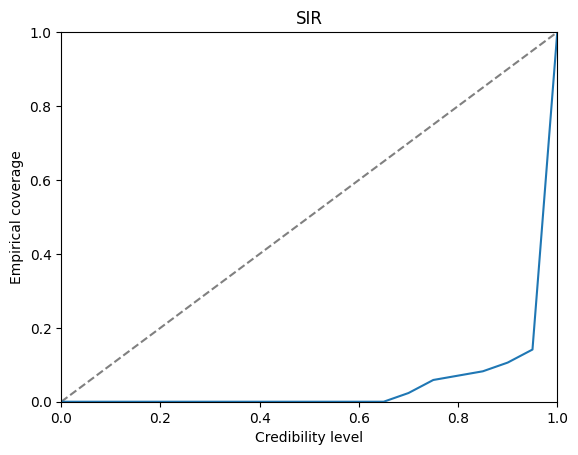

In [14]:
directory = '../res/sir/snl/'
generate_coverage_plot(directory, title="SIR")